In [22]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
from astropy import units as u, constants as c
from astropy.cosmology import FlatLambdaCDM

"""
units: Msun, Mpc, yr



"""
cosmo0 = FlatLambdaCDM(Om0=0.3,H0=70)

def mm(zz,beta,gamma):
    """Returns M(z)/M_0 following
        , Onsori, Ma (2009)
        M/M0 = (1+z)^beta e^-gamma z
    """
    return (1+zz)**beta * np.exp(-gamma*zz)

plt.close("all")

# (β, γ) are (0.10, 0.69)
beta = .1
gamma = .69

zzz = np.linspace(0,4,num=401)

fig,ax = plt.subplots(1,2,sharex=True)

iax = ax[0]
iax.plot(zzz,m(zzz,beta,gamma))
iax.set_xlabel("$z$")
iax.set_ylabel("$M(z)/M_0$")

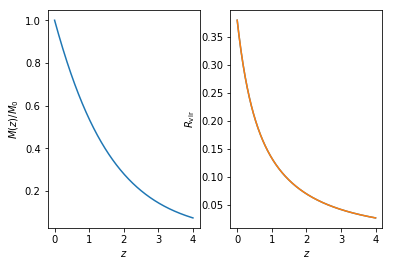

In [24]:
xx = cosmo0.Om(zzz)
Delta = 18*np.pi**2 + 82. * (xx-1) - 39 * (xx-1)**2

M0 = 1e12
rho0c = cosmo0.critical_density0.to(u.Msun/u.Mpc**3).value
# print (4./3. * np.pi * 1. *Delta * rho0c)

Rvir = (3*M0*mm(zzz,beta,gamma)/(4*Delta*rho0c))**(1./3.)/(1+zzz)
iax = ax[1]
iax.plot(zzz,Rvir)
iax.set_xlabel("$z$")
iax.set_ylabel("$R_\mathrm{vir}$")

plt.show()

In [16]:
print(rho0c)


1.35992947349e+11 solMass / Mpc3
